In [6]:
from typing import Union
import h5py

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import LogNorm

In [7]:
file_path = "data/"

In [8]:
file_name = "ttno_bond_dim_10000_root_at_1.hdf5" # "ttno_bond_dim.hdf5"

with h5py.File(file_path + file_name, "r") as file:
    
    svd_bonds = file["run_with_1_terms"]["svd_bond_dim"][0:-1]
    ham_bonds = file["run_with_1_terms"]["state_diag_bond_dim"][0:-1]
    
    # For a single term there should only be a single bond_dim
    assert np.allclose(np.ones_like(svd_bonds), svd_bonds)
    assert np.allclose(np.ones_like(svd_bonds), ham_bonds)
    
    num_terms = 8
    svd_bonds = file[f"run_with_{num_terms}_terms"]["svd_bond_dim"][0:-1]
    ham_bonds = file[f"run_with_{num_terms}_terms"]["state_diag_bond_dim"][0:-1]

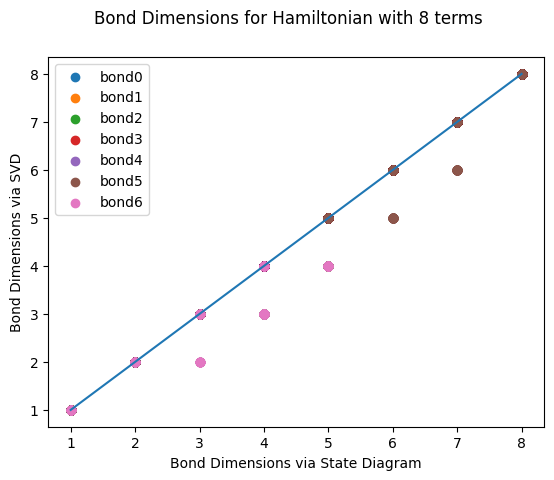

In [9]:
fig = plt.figure()
# As a reference
plt.plot(range(1,num_terms + 1), range(1,num_terms + 1))

for i in range(0,7):
    plt.scatter(ham_bonds[:, i], svd_bonds[:, i], label=f"bond{i}")
    
plt.suptitle(f"Bond Dimensions for Hamiltonian with {num_terms} terms")
plt.xlabel("Bond Dimensions via State Diagram")
plt.ylabel("Bond Dimensions via SVD")
plt.legend()
plt.show()

In [10]:
def plot_bond_dimensions_for_max_terms(num_terms: int, file_path: str, save_path: Union[str,None]=None):
    font = {'family' : 'monospace',
            'size'   : 19}
    plt.rc('font', **font)  # pass in the font dict as kwargs
    with h5py.File(file_path, "r") as file:
        svd_bonds = file[f"run_with_{num_terms}_terms"]["svd_bond_dim"][0:-1]
        ham_bonds = file[f"run_with_{num_terms}_terms"]["state_diag_bond_dim"][0:-1]

    paired_dims = list(zip(ham_bonds.flatten(), svd_bonds.flatten()))
    paired_set = set(paired_dims)

    paired_counts = np.asarray([[pair[0], pair[1], paired_dims.count(pair)] for pair in paired_set])
    fig2 = plt.figure(figsize=(8,7))
    # As a reference
    plt.plot(range(1,num_terms + 1), range(1,num_terms + 1))

    plt.scatter(paired_counts[:,0], paired_counts[:,1], c=paired_counts[:,2], cmap='YlOrRd',
                norm=LogNorm())
    plt.xlabel("Bond Dimensions via State Diagram")
    plt.ylabel("Bond Dimensions via SVD")
    plt.colorbar()
    if save_path is not None:
        plt.savefig(save_path, format="pdf", bbox_inches='tight')
    plt.show()

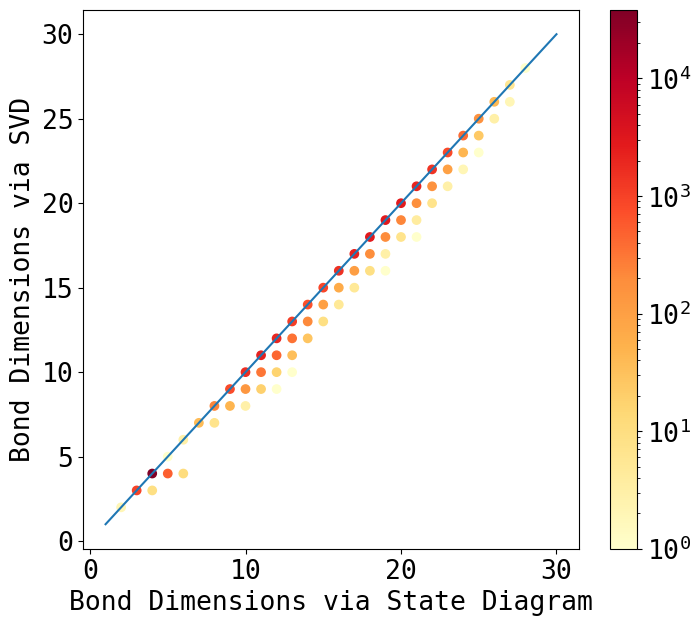

In [11]:
plot_bond_dimensions_for_max_terms(30, file_path+file_name, file_path+"plot_root_at_1.pdf")

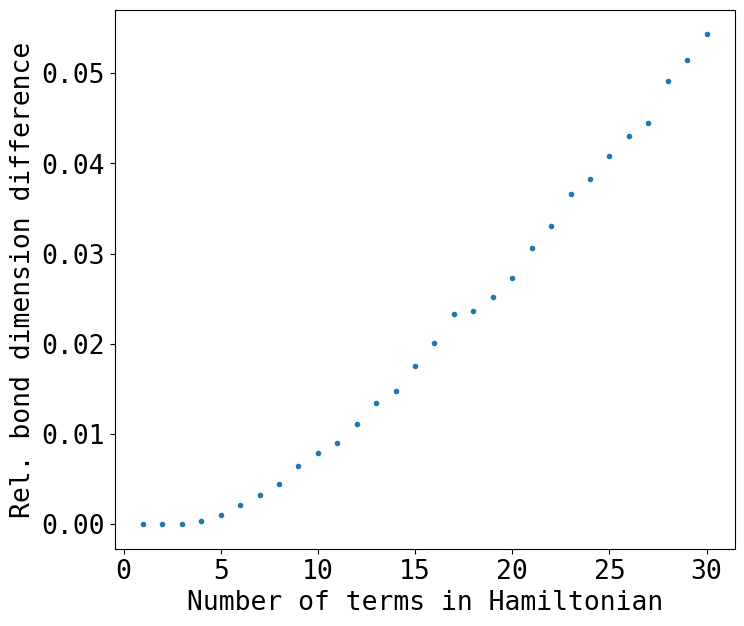

In [12]:
max_num_terms = 30
diffs = np.zeros(30)

for num_terms in range(1, max_num_terms + 1):
    with h5py.File(file_path + file_name, "r") as file:
        svd_bonds = file[f"run_with_{num_terms}_terms"]["svd_bond_dim"][0:-1]
        ham_bonds = file[f"run_with_{num_terms}_terms"]["state_diag_bond_dim"][0:-1]
        
        diff_bonds = ham_bonds - svd_bonds
        
        num_elements = np.asarray(diff_bonds.shape).prod()
        total_diff = diff_bonds.sum()
        
        rel_diff = total_diff / num_elements
    
        diffs[num_terms - 1] = rel_diff

fig3 = plt.figure(figsize=(8,7))
plt.scatter(range(1,max_num_terms + 1),diffs, marker=".")

plt.xlabel("Number of terms in Hamiltonian")
plt.ylabel("Rel. bond dimension difference")
plt.savefig(file_path + "relative_bond_dim_difference.pdf", format="pdf", bbox_inches='tight')

plt.show()

## Dimensions for 5 as Root

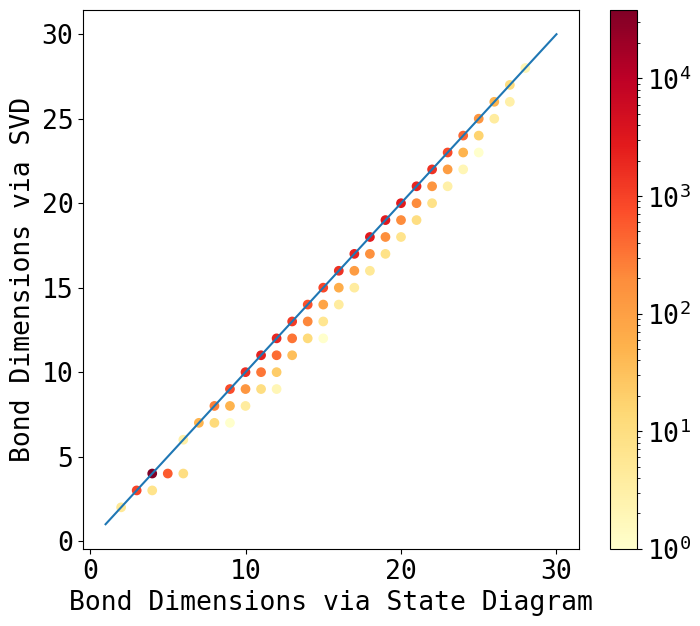

In [13]:
plot_bond_dimensions_for_max_terms(30, file_path + "ttno_bond_dim_10000_root_at_5.hdf5", save_path=file_path + "plot_root_at_5.pdf")

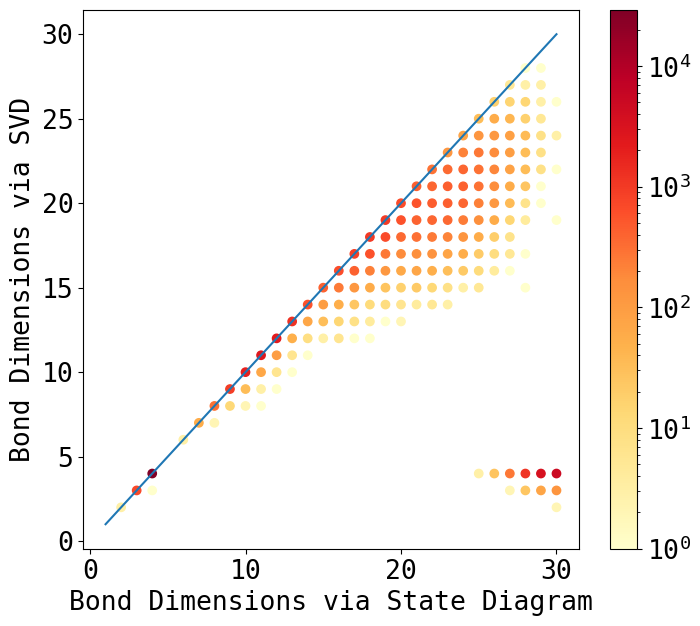

In [14]:
plot_bond_dimensions_for_max_terms(30, file_path + "ttno_bond_dim_10000_root_at_6.hdf5", save_path=file_path + "plot_root_at_6.pdf")